In [1]:
from tqdm import tqdm
from ibapi.client import EClient
from ibapi.common import BarData
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

import threading
import time

import pandas as pd
df = pd.read_parquet("US100.parquet")
code_list = list(df.columns)
code_list = [i for i in code_list if i != "US100"]
class IBapi(EWrapper, EClient):
    def __init__(self, code_list):
        EClient.__init__(self, self)
        self.df = []
        self.df_list = []
        self.count = 0
        self.code_list = code_list

    def historicalData(self, reqId, bar):
        self.df.append([bar.date, bar.close, code_list[self.count]])

    def historicalDataEnd(self, reqId: int, start: str, end: str):
        super().historicalDataEnd(reqId, start, end)  # Call base class implementation
        self.df_list.append(self.df)  # Add collected data to list
        self.df = []
        self.count += 1  # Increment the count of completed requests

def run_loop():
    app.run()
    
app = IBapi(code_list=code_list)
app.connect('127.0.0.1', 7496, 11)
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()
time.sleep(1)
reqID = 1
for symbol in code_list:
    print(symbol)
    apple_contract = Contract()
    apple_contract.symbol = symbol
    apple_contract.secType = 'STK'
    apple_contract.exchange = 'SMART'
    apple_contract.currency = 'USD'
    #Request Market Data
    app.reqHistoricalData(reqID, apple_contract, '', '1 W', '1 min', 'MIDPOINT', True, 1, False, [])
    reqID += 1


ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


AAPL
ABNB
ADBE
ADI
ADP
ADSK
AEP
AMAT
AMD
AMGN
AMZN
ANSS
ARM
ASML
AVGO
AZN
BIIB
BKNG
BKR
CCEP
CDNS
CDW
CEG
CHTR
CMCSA
COST
CPRT
CRWD
CSCO
CSGP
CSX
CTAS
CTSH
DASH
DDOG
DLTR
DXCM
EA
EXC
FANG
FAST
FTNT
GEHC
GFS
GILD
GOOG
GOOGL
HON
IDXX
ILMN
INTC
INTU
ISRG
KDP
KHC
KLAC
LIN
LRCX
LULU
MAR
MCHP
MDB
MDLZ
MELI
META
MNST
MRNA
MRVL
MSFT
MU
NFLX
NVDA
NXPI
ODFL
ON
ORLY
PANW
PAYX
PCAR
PDD
PEP
PYPL
QCOM
REGN
ROP
ROST
SBUX
SNPS
TEAM
TMUS
TSLA
TTD
TTWO
TXN
VRSK
VRTX
WBA
WBD
WDAY
XEL
ZS


ERROR 2 200 The contract description specified for ABNB is ambiguous.
ERROR 29 200 The contract description specified for CSCO is ambiguous.
ERROR 40 200 The contract description specified for FANG is ambiguous.
ERROR 65 200 The contract description specified for META is ambiguous.


In [2]:
df_list = app.df_list
df_list_f = sum(df_list, [])
final = pd.DataFrame(df_list_f)
final.columns = ['da', 'cl', 'code']
pivoted = final.pivot(values='cl', index='da', columns='code')
pivoted

code,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,ROST,SBUX,SNPS,TEAM,TMUS,TSLA,TTD,TTWO,TXN,VRSK
da,,,,,,,,,,,,,,,,,,,,,
20240819 06:30:00,225.30,552.00,222.49,265.21,248.35,207.19,147.95,97.41,325.98,202.56,...,153.85,266.84,477.15,60.11,150.41,101.28,230.19,7.41,200.04,11.00
20240819 06:31:00,225.44,551.43,222.77,265.21,248.86,206.31,148.96,97.31,325.98,202.46,...,153.64,266.78,477.25,60.14,150.28,101.27,230.50,7.37,200.10,11.03
20240819 06:32:00,224.93,553.01,223.07,265.53,249.43,206.30,149.17,97.18,325.93,202.50,...,153.84,266.75,477.25,60.14,150.28,101.56,231.84,7.38,200.19,11.00
20240819 06:33:00,225.09,551.92,223.13,265.40,249.54,205.75,148.70,97.09,325.88,202.50,...,153.35,267.48,478.84,60.14,150.75,101.45,231.52,7.37,200.05,10.96
20240819 06:34:00,224.78,551.22,223.00,265.40,249.73,205.53,149.27,97.14,325.94,202.88,...,153.90,267.45,478.66,60.16,150.68,101.25,230.96,7.39,200.22,11.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240823 12:55:00,226.80,558.22,228.42,269.72,255.21,202.20,154.93,98.31,323.51,205.23,...,159.57,268.21,482.67,60.17,159.38,105.08,259.81,8.05,209.93,10.34
20240823 12:56:00,226.92,558.57,228.65,269.57,255.34,202.69,155.09,98.28,323.45,205.17,...,159.50,268.29,482.24,60.16,159.41,105.06,259.86,8.05,210.06,10.34
20240823 12:57:00,226.84,558.34,228.46,269.69,255.16,202.66,154.97,98.27,323.47,205.24,...,159.59,268.31,482.10,60.13,159.34,104.98,259.85,8.04,209.94,10.32


In [3]:
from tqdm import tqdm
from ibapi.client import EClient
from ibapi.common import BarData
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

import threading
import time
import pandas as pd
app.disconnect()
df = pd.read_parquet("US100.parquet")
code_list = list(df.columns)
code_list = code_list + []
class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.df = []
        self.df_list = []
        self.count = 0

    def historicalData(self, reqId, bar):
        self.df.append([bar.date, bar.close])

    def historicalDataEnd(self, reqId: int, start: str, end: str):
        super().historicalDataEnd(reqId, start, end)  # Call base class implementation
        self.df_list.append(self.df)  # Add collected data to list
        self.df = []
        self.count += 1  # Increment the count of completed requests

def run_loop():
    app.run()
    
app = IBapi()
app.connect('127.0.0.1', 7496, 111)
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()
time.sleep(1)
reqID = 1
for symbol in ['QQQ']:
    print(symbol)
    apple_contract = Contract()
    apple_contract.symbol = symbol
    apple_contract.secType = 'STK'
    apple_contract.exchange = 'SMART'
    apple_contract.currency = 'USD'
    #Request Market Data
    app.reqHistoricalData(reqID, apple_contract, '', '1 W', '1 min', 'MIDPOINT', True, 1, False, [])
    reqID += 1


ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


QQQ


In [4]:
qqq = pd.DataFrame(sum(app.df_list, []))
qqq.columns= ['da', 'QQQ']
qqq.set_index('da', inplace=True)
pivoted['QQQ'] = qqq['QQQ']

In [15]:
import numpy as np
def backtest_code(code, benchmark = 2):
    rolling = 5
    benchmark_index = "QQQ"
    
    res = pivoted[[code, benchmark_index]]
    pivoted.ffill()
    ret = res.pct_change(fill_method=None).dropna()
    try:
        ret['stock_price'] = pivoted[code]
        ret['ret_diff'] = ret[code] - ret[benchmark_index]
        # type 1
        # ret['ret_diff_std'] = ret['ret_diff'].rolling(rolling).std() * 100
        # ret['ret_diff_mean'] = ret['ret_diff'].rolling(rolling).mean() * 100
        # ret['stdize_ret_diff'] = abs((ret['ret_diff'] - ret['ret_diff_mean'])/ret['ret_diff_std'])
        
        # type 2
        ret['ret_diff_std'] = ret['ret_diff'].rolling(rolling).std()
        ret['ret_diff_mean'] = ret['ret_diff'].rolling(rolling).mean()
        ret['stdize_ret_diff'] = abs((ret['ret_diff'] - ret['ret_diff_mean'])*ret['ret_diff_std'])*10000

        ret[code] = pivoted[code]
        ret[benchmark_index] = pivoted[benchmark_index]
        ret['index'] = [i for i in range(len(ret))]

        # check direction

        ret['lag10'] = ret[code].shift(-5)
        ret['lag10_twii'] = ret[benchmark_index].shift(-5)
        ret['change_stock'] = (ret['lag10'] - ret[code])/ret[code]
        ret['change_twii'] = (ret['lag10_twii'] - ret[benchmark_index])/ret[benchmark_index]
        ret['filter_1'] = ret.apply(lambda x: 1 if abs(x['change_stock'] - x['change_twii']) < abs(x['change_stock']) else 0, axis=1)
        ret['filter_2'] = ret.apply(lambda x: 0 if abs(x['change_stock']) < abs(x['change_twii']) else 1, axis=1)

        # check raise
        ret[f'{code}_lag60'] = ret[code].shift(-60)
        ret['stock_price'] = pivoted[code]
        ret['direction'] = ret.apply(lambda x: -1 if x[code] - x['lag10'] > 0 else 1, axis=1)
        ret['target_60mins'] = (np.round((ret[f'{code}_lag60'] - ret[code])/ret[code], 3)) * ret['direction']
        ret = ret[(ret['stdize_ret_diff'] >= 2) & (ret['filter_1'] == 1) & (ret['filter_2'] == 1)][['target_60mins', 'stdize_ret_diff', 'direction']].dropna()
        
        ret['code'] = code
        
        return ret
    except Exception as e:
        # print(pivoted)
        print(e)
        pass

dfs = []
for code in tqdm(list(pivoted.columns)):
    if code == 'QQQ': continue
    df = backtest_code(code)
    dfs.append(df)

100%|██████████| 96/96 [00:02<00:00, 36.41it/s]


In [16]:
final = pd.concat(dfs)
final['date'] = final.index
final['date'] = final['date'].apply(lambda x: x[0:8])
df_cleaned = final.drop_duplicates(subset=['date', 'code'])

df_cleaned = df_cleaned.drop(columns=['date'])
df_cleaned

code,target_60mins,stdize_ret_diff,direction,code
da,,,,
20240821 06:30:00,0.008,2.922010,-1,ADBE
20240822 06:30:00,0.021,3.985464,-1,BIIB
20240821 06:30:00,0.031,5.331279,-1,CDNS
20240820 06:30:00,0.011,2.992912,1,EXC
20240823 06:30:00,0.034,5.846011,-1,FANG
20240822 06:30:00,-0.000,3.854445,-1,LRCX
20240820 06:30:00,0.033,6.074441,1,ODFL
20240823 06:30:00,0.028,5.407059,-1,ON
20240821 06:30:00,0.019,12.776524,-1,PEP


In [17]:
import numpy as np
import pandas as pd
from scipy import stats
# to test if return after 60 mins are greater than {test}
for test in range(0, 40, 1):
    test /= 1000
    final = df_cleaned
    final = final[final['target_60mins'] != 0.0]
    final['target_60mins'] = final['target_60mins'] - test
    mean = final['target_60mins'].mean()
    n = len(final)
    s = final['target_60mins'].std()

    t_statistic = (mean - 0.0) / (s / np.sqrt(n))

    t_stat, p_value = stats.ttest_1samp(final['target_60mins'], 0.0)

    if t_stat > 0:
        one_tailed_p_value = p_value / 2
    else:
        one_tailed_p_value = 1 - (p_value / 2)
    if one_tailed_p_value <= 0.01:
        continue
    elif one_tailed_p_value > 0.01 and one_tailed_p_value < 0.05:
        print(f"{test} P-value: {np.round(one_tailed_p_value, 2)} {np.round(t_statistic, 2)}")
    else:
        print(f"{test} P-value: {np.round(one_tailed_p_value, 2)} {np.round(t_statistic, 2)}")
        break
print("US100", len(final))
final

0.016 P-value: 0.01 2.8
0.017 P-value: 0.02 2.51
0.018 P-value: 0.03 2.22
0.019 P-value: 0.04 1.93
0.02 P-value: 0.07 1.63
US100 10


/var/folders/cb/s9sjq6dx01990v5hdvfhl7x40000gn/T/ipykernel_36640/3698910193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['target_60mins'] = final['target_60mins'] - test


code,target_60mins,stdize_ret_diff,direction,code
da,,,,
20240821 06:30:00,-0.012,2.922010,-1,ADBE
20240822 06:30:00,0.001,3.985464,-1,BIIB
20240821 06:30:00,0.011,5.331279,-1,CDNS
20240820 06:30:00,-0.009,2.992912,1,EXC
20240823 06:30:00,0.014,5.846011,-1,FANG
20240820 06:30:00,0.013,6.074441,1,ODFL
20240823 06:30:00,0.008,5.407059,-1,ON
20240821 06:30:00,-0.001,12.776524,-1,PEP
20240822 06:30:00,0.023,2.420556,-1,PYPL


In [21]:
code = 'ADBE'
benchmark_index = "QQQ"
rolling = 10
ret = pivoted[[code, benchmark_index]].pct_change()
ret['ret_diff'] = ret[code] - ret[benchmark_index]
# type 1
# ret['ret_diff_std'] = ret['ret_diff'].rolling(rolling).std() * 100
# ret['ret_diff_mean'] = ret['ret_diff'].rolling(rolling).mean() * 100
# ret['stdize_ret_diff'] = abs((ret['ret_diff'] - ret['ret_diff_mean'])/ret['ret_diff_std'])

# type 2
ret['ret_diff_std'] = ret['ret_diff'].rolling(rolling).std()
ret['ret_diff_mean'] = ret['ret_diff'].rolling(rolling).mean()
ret['stdize_ret_diff'] = abs((ret['ret_diff'] - ret['ret_diff_mean'])*ret['ret_diff_std'])*10000


ret[code] = pivoted[code]
ret[benchmark_index] = pivoted[benchmark_index]
ret['index'] = [i for i in range(len(ret))]

# check direction

ret['lag10'] = ret[code].shift(-5)
ret['lag10_twii'] = ret[benchmark_index].shift(-5)
ret['change_stock'] = (ret['lag10'] - ret[code])/ret[code]
ret['change_twii'] = (ret['lag10_twii'] - ret[benchmark_index])/ret[benchmark_index]
ret['filter_1'] = ret.apply(lambda x: 1 if abs(x['change_stock'] - x['change_twii']) < abs(x['change_stock']) else 0, axis=1)
ret['filter_2'] = ret.apply(lambda x: 0 if abs(x['change_stock']) < abs(x['change_twii']) else 1, axis=1)

# check raise
ret[f'{code}_lag60'] = ret[code].shift(-60)
ret['stock_price'] = pivoted[code]
ret['direction'] = ret.apply(lambda x: -1 if x[code] - x['lag10'] > 0 else 1, axis=1)
ret['target_60mins'] = (np.round((ret[f'{code}_lag60'] - ret[code])/ret[code], 3)) * ret['direction']

ret.set_index('index', inplace=True, drop=False)
ret[ret['stdize_ret_diff'] >= 2].head(5)

code,ADBE,QQQ,ret_diff,ret_diff_std,ret_diff_mean,stdize_ret_diff,index,lag10,lag10_twii,change_stock,change_twii,filter_1,filter_2,ADBE_lag60,stock_price,direction,target_60mins
index,,,,,,,,,,,,,,,,,
780,230.19,481.05,0.028506,0.009043,0.002942,2.311732,780,227.38,480.81,-0.012207,-0.000499,1,1,228.24,230.19,-1,0.008


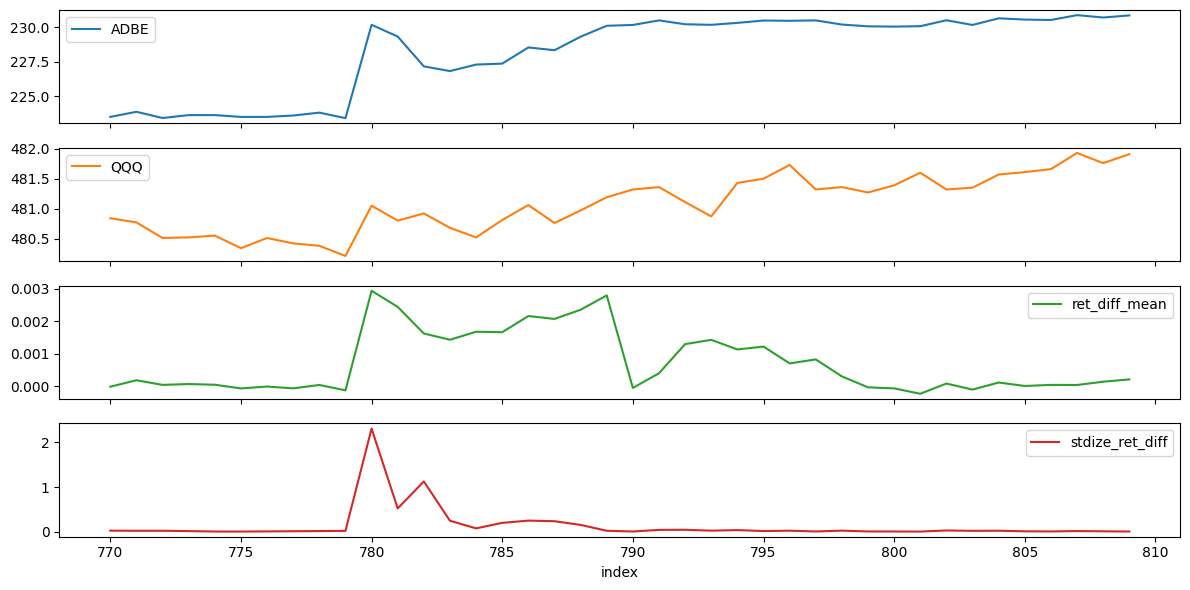

In [22]:
import matplotlib.pyplot as plt
start = 770
end = len(ret)
end = 810
bm = 2
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 6), sharex=True)
ret.iloc[start:end, [0, 1, 4, 5]].plot(ax=axes, subplots=True, legend=True)
# for index, row in ret.iloc[start:end, :][ret['stdize_ret_diff'] >= bm].iterrows():  
#     for ax in axes:
#         ax.axvline(row['index'], color='red')
plt.tight_layout()
plt.show()